In [1]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

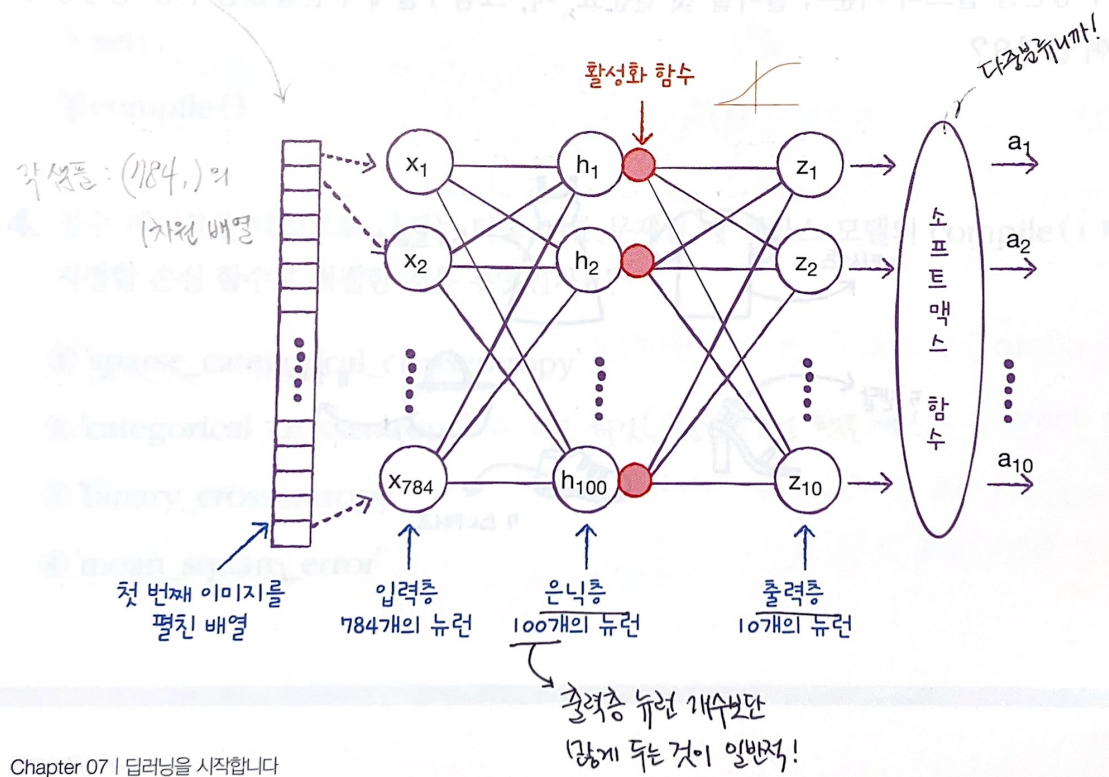

모델의 대략적인 구조는 위와 같다.

입력층과 출력층 사이에 있는 모든 층을 **은닉층(hidden layer)**이라고 한다.

은닉층에서는 활성화 함수가 있는데 활성화 함수는 신경망 층의 선형 방정식의 계산 값에 적용하는 함수이다.


출력층에서 사용하는 활성화 함수

*   이진 분류 : 시그모이드
*   다중 분류 : 소프트맥스


은식층에서 사용하는 활성화 함수(비교적 자유로움)
: 시그모이드 함수, 렐루(ReLu)함수



---


*회귀를 위한 신경망의 출력층에서는 활성화 함수를 적용하지 않는다.
즉, 출력층의 선형 방정식의 계산을 그대로 출력한다.

**은닉층에서 활성화 함수를 적용하는 이유**

a x 4 + 2 = b

b x 3 - 5 = c  

-> a x 12 + 1 = c
이러면 b가 하는 일이 없어진다.


---

신경망도 마찬가지이다.

은닉층에서 선형적인 산술 계산만 수행한다면 수행 역할이 없는 셈이다.

따라서 밑의 식과 같이 선형 계산을 적당하게 비선형적으로 비틀어 주어야 한다.

a x 4 + 2 = b

log(b) = k

k x 3 - 5 = c



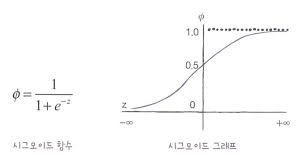

은닉층에서 많이 사용하는 활성화 함수 중 하나는 시그모이드 함수이다.

이 함수는 뉴런의 출력 z값을 0 ~ 1사이로 압축한다.

In [3]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape = (784,)) ##은닉층
dense2 = keras.layers.Dense(10, activation='softmax')
## 은닉충은 츌력층의 뉴런보다 많아야함

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **심층 신경망(deep neural network)생성**

In [4]:
model = keras.Sequential([dense1, dense2])

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

맨 처음 줄에는 모델의 이름이 나오고 모델에 들어있는 층이 순서대로 출력된다.

층마다 층 이름, 클래스, 출력 크기, 모델 파라미터 개수가 출력된다.

출력 크기를 보면(None, 100)이다. 아직 샘플 개수가 정의되어있지 않아 None이다.

케라스 모델의 fit() 메서드에 훈련 데이터를 주입하면 데이터를 한 번에 모두 사용하지 않고 잘게 나누어 여러번 걸쳐 경사 하강법 단계를 수행한다.

즉, **미니배치 경사 하강법**이다.



---
케라스의 기본 미니 배치 크기는 32이다.
이는 fit()메서드에서 batch_size 매개변수로 변경 가능하다.

두 번째 100은 은닉층의 뉴런의 개수를 100개로 두었기에 100개의 출력이 나온다.


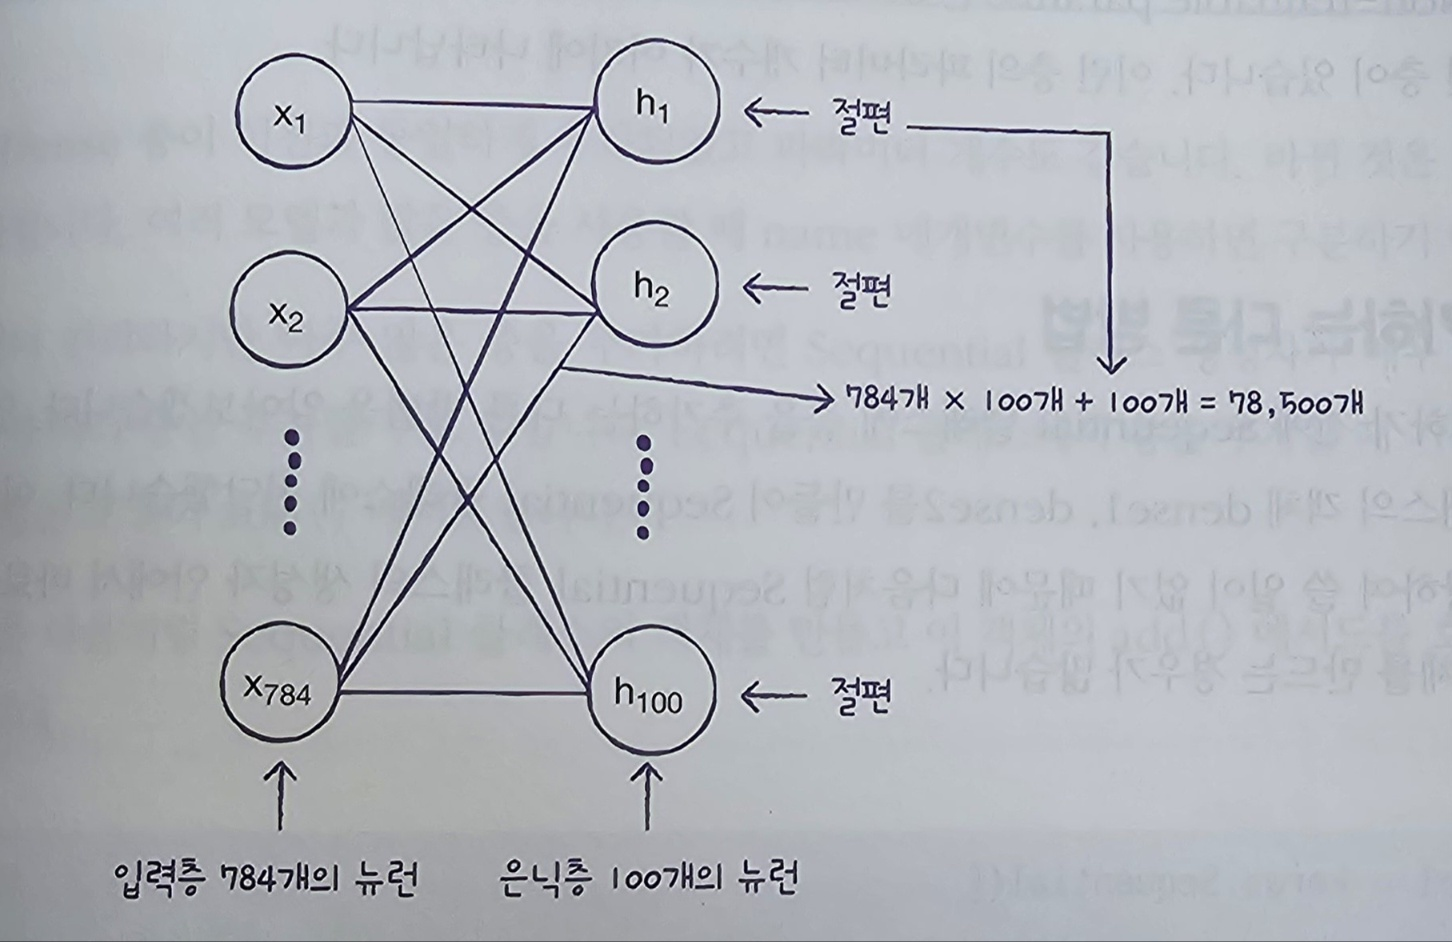



---
마지막으로 모델 파라미터 개수가 출력된다.

이 층은 Dense 층이므로 입력 픽셀 784개와 100개의 모든 조합에 대한 가중치가 있다.

그리고 뉴런마다 1개의 절편이 있다.



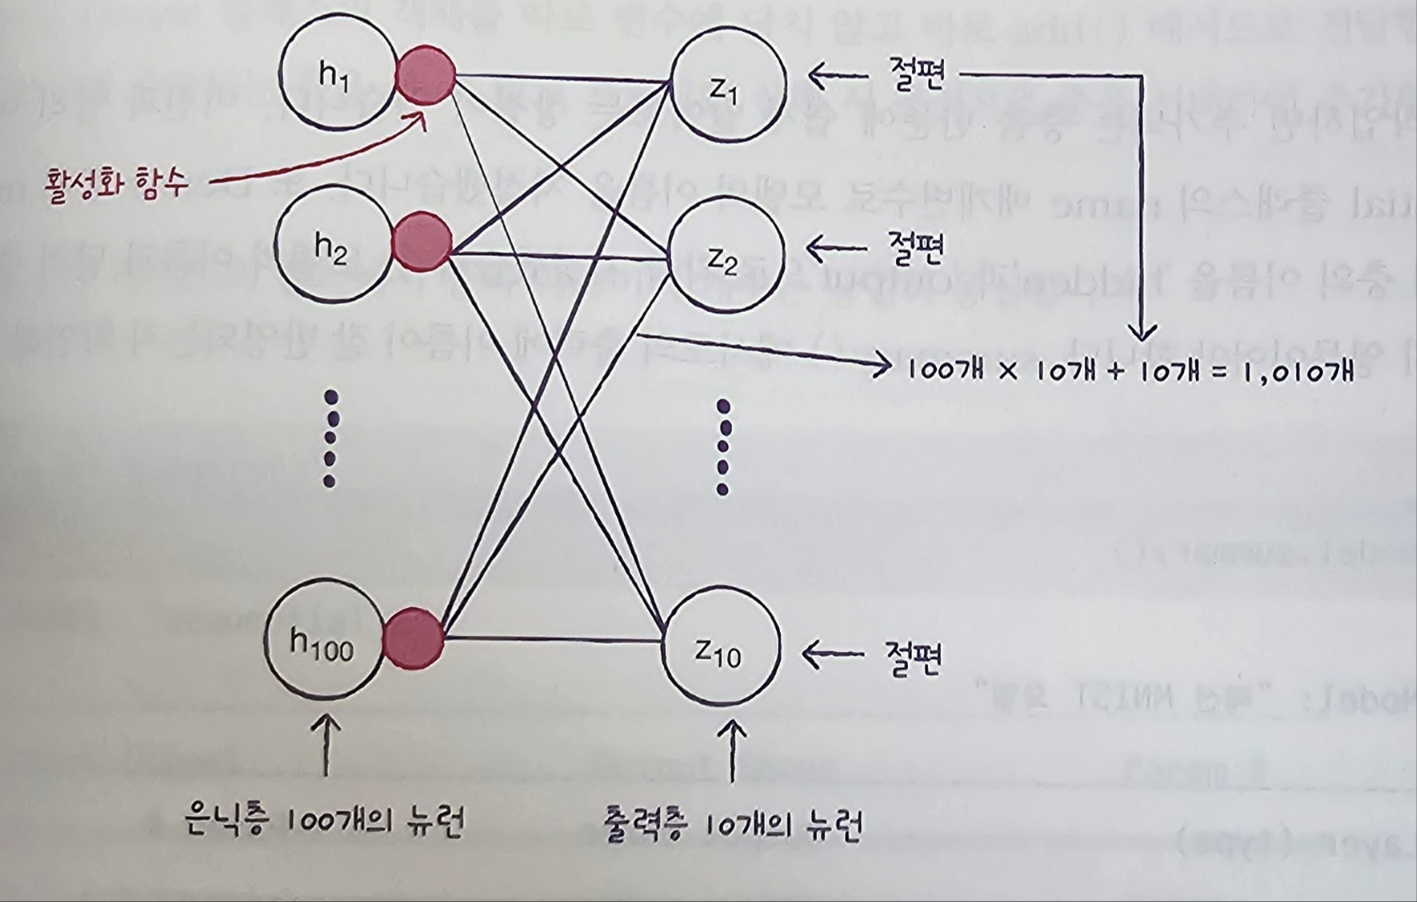



---
두 번째 층의 출력 크기는 (None, 10)이다.

배치 차원은 동일하게 None이고 뉴런의 개수가 10개이기 때문이다.

100개의 은닉층 뉴런과 10개의 출력층 뉴런이 연결되고 출력층의 뉴런마다 하나의 절편이 있기 때문에 총 1,010개의 모델 파라미터가 있다.




---

**층을 추가하는 다른 방법**


1.  


In [6]:
model = keras.Sequential([keras.layers.Dense(100,activation = 'sigmoid',input_shape = (784,),name = 'hidden'),
                          keras.layers.Dense(10,activation = 'softmax',name = 'output')],
                         name = '패션 MNIST 모델')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "패션 MNIST 모델"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden (Dense)                       │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)


2.



In [8]:
model = keras.Sequential()
model.add(keras.layers.Dense(100,activation = 'sigmoid',input_shape = (784,),name = 'hidden'))
model.add(keras.layers.Dense(10,activation = 'softmax',name = 'output'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden (Dense)                       │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model.fit(train_scaled,train_target,epochs = 5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7467 - loss: 0.7743
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8482 - loss: 0.4217
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8629 - loss: 0.3805
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8718 - loss: 0.3525
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8791 - loss: 0.3347


# **렐루 함수(ReLU)**

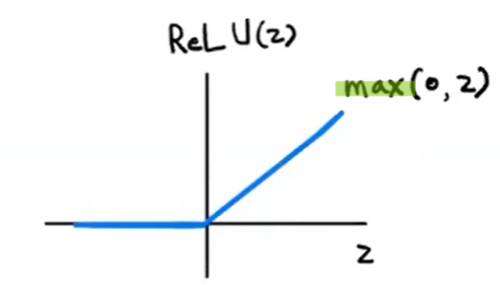

층이 많은 심층 신경망일수록 효과가 누적되어 학습이 더 어려워진다. 이를 개선하기 위한 활성화 함수가 **렐루(ReLU)**이다.

입력이 양수일 경우 활성화 함수가 없는 것처럼 그냥 입력을 통과시키고 음수의 경우 0으로 만든다.  

렐루 함수는 max(0,z)와 같이 쓸 수 있다.

이 함수는 z가 0보다 크면 z를 출력하고 z가 0보다 작으면 0을 출력한다.

In [16]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Flatten 클래스는 배치 차원을 제외하고 나머지 입력차원을 모두 일렬로 펼치는 작업을 한다.

Flatten 클래스는 인공 신경망에 성능을 위해 기여하는 바는 없지만 입력층과 은닉층 사이에 추가하기 때문에 층이라고 부른다.

In [17]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [19]:
model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7660 - loss: 0.6751
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8548 - loss: 0.4061
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8723 - loss: 0.3593
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8809 - loss: 0.3340
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8863 - loss: 0.3194


In [20]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8646 - loss: 0.3917


[0.39822813868522644, 0.862500011920929]

# **옵티마이저(optimizer)**

지금가지 다룬 하이퍼파라미터(모델이 학습하지 않아 사람이 지정해주어야하는 파라미터)는 추가할 은닉층의 개수, 뉴런 개수, 활성화 함수, 층의 종류, 배치 사이즈 매개변수, 에포크 매개변수 등이 있다.

compile() 메서드에서는 케라스의 기본 경사 하강법 알고리즘인 RMSprop을 사용하였다. 케라스는 다양한 종류의 경사 하강법 알고리즘을 제공하는데 이들을 **옵티마이저**라고 한다.

가장 기본적인 옵티마이저는 확률적 경사 하강법인 SGD이다.



```
model.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
```
또는



```
sgd = keras.optimizers.SGD()
model.compile(optimizer = sgd, loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
```

SGD 클래스의 학습률 기본값이 0.01일 때 이를 바꾸고 싶다면


```
sgd = keras.optimizers.SGD(learning_rate = 0.1)
```





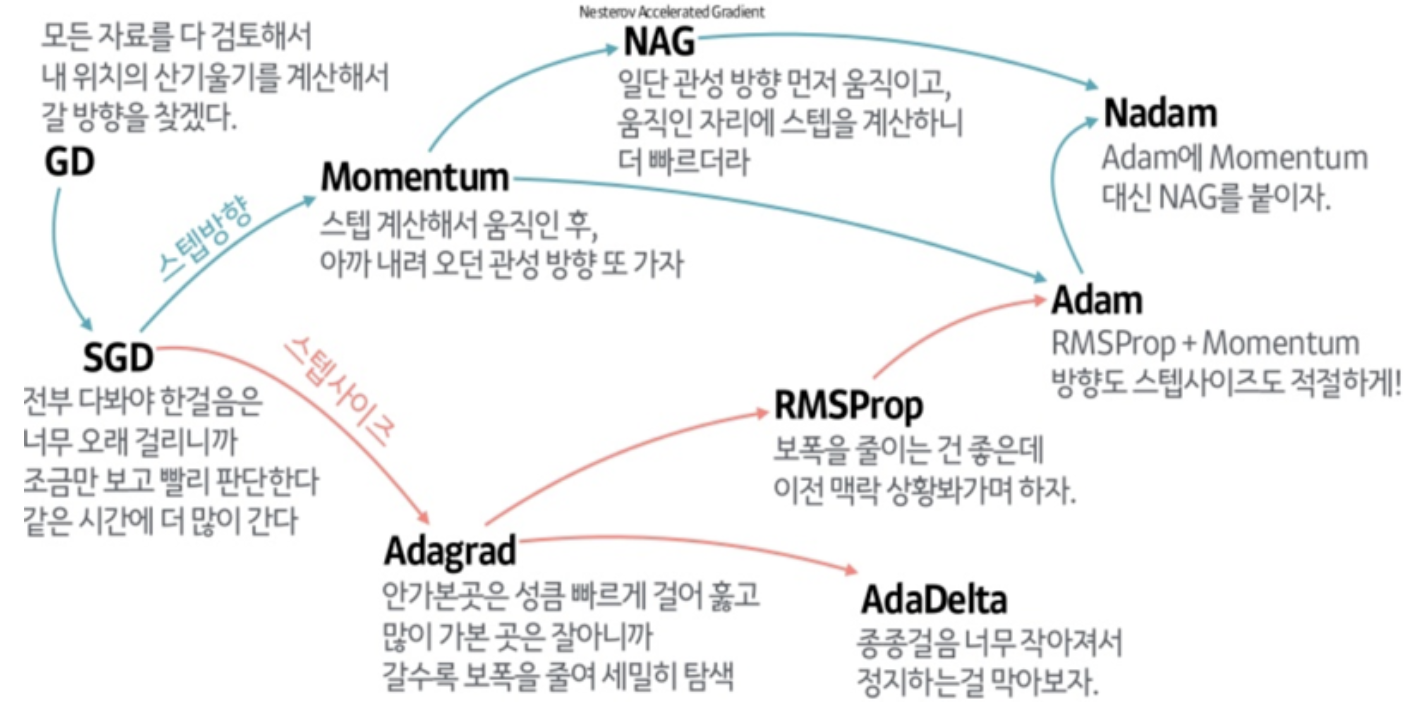

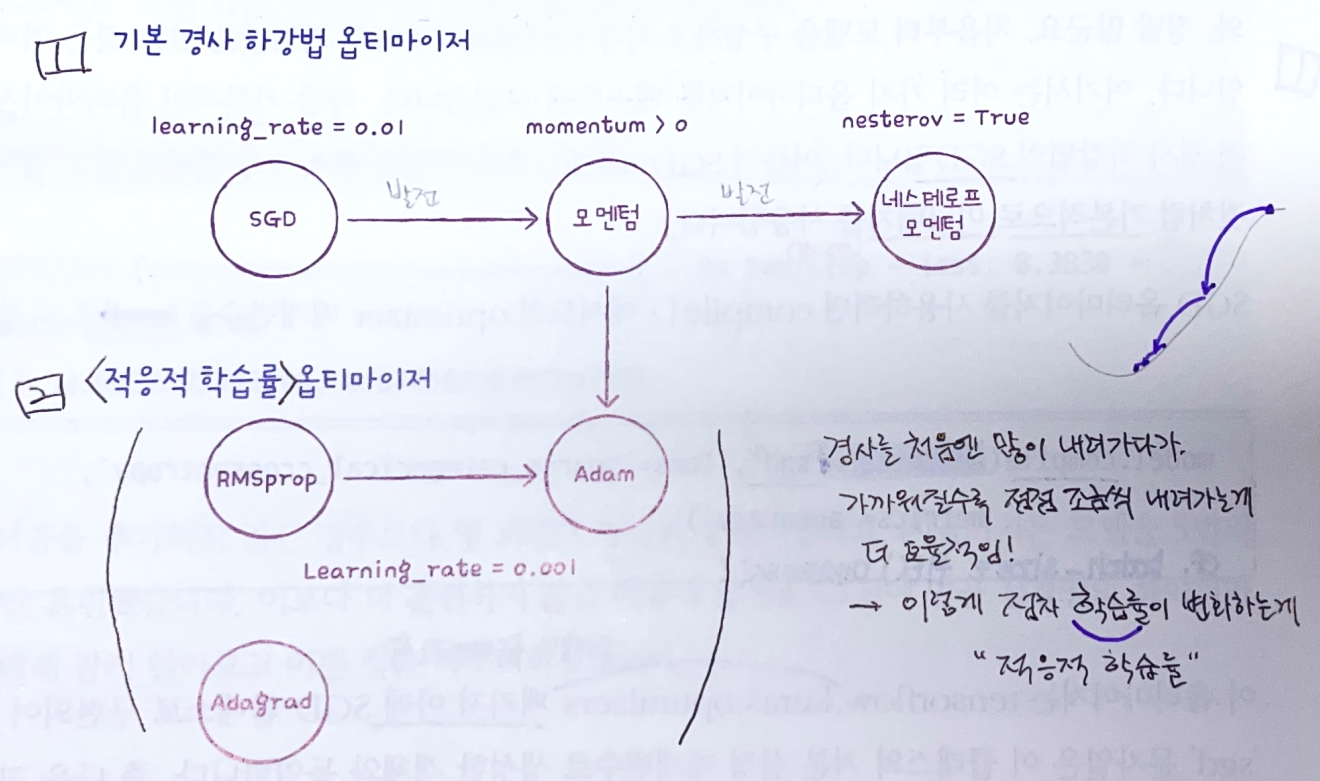

기본 경사 하강법 옵티마이저는 모두 SGD클래스에서 제공한다.

SGD 클래스의 momentum 매개변수의 기본 값은 0이다. 0보다 큰 값으로 지정하면 이전의 그레이디언트를 가속도처럼 사용하는 **모멘텀 최적화(momentum optimization)**를 사용한다.

보통 momentum 매개변수는 0.9이상을 지정한다.


---


또, SGD클래스의 nesterov 매개변수를 기본값 False에서 True로 바꾸면 **네스테로프 모멘텀 최적화(nesterov momentum optimization,네스테로프 가속 경사)**를 사용한다.



```
sgd = keras.optimizers.SGD(momentum = 0.9, nesterov = True)
```



모델이 최적점에 가까이 갈수록 학습률을 낮출 수 있다. 이렇게 하면 안정적으로 최적접에 수렴할 가능성이 높은데 이러한 학습률을 **적응적 학습률(adaptive learning rate)**라고 한다.

이런 방식들은 학습률 매개변수를 튜닝하는 수고를 덜 수 있다.

적응적 학습률을 사용하는 대표적인 옵티마이저는


*   adagrad
*   rmsprop

이다.





```
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer = adagrad, loss = 'sparse_caategorical_crossentropy',
              metrics = ['accuracy'])
```



```
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer = rmsprop, loss = 'sparse_caategorical_crossentropy',
              metrics = ['accuracy'])
```



모멘텀 최적화와 RMSprop의 장점을 접목한 것이 **Adam**이다.

즉, 모멘텀 최적화 + 적응적 학습률 = Adam이라고 생각할 수 있다.

In [21]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7694 - loss: 0.6726
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8596 - loss: 0.3909
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8694 - loss: 0.3563
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8804 - loss: 0.3224
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8891 - loss: 0.3029


In [24]:
model.evaluate(val_scaled,val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8780 - loss: 0.3479


[0.34679678082466125, 0.8763333559036255]